In [1]:
import pandas as pd
import os

# Path to the dataset
file_path = r'dataset.csv'

# Check if the file exists
if not os.path.isfile(file_path):
    print(f"File not found: {file_path}")
else:
    # Load the dataset
    df = pd.read_csv(file_path)
    print(df.head())

  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   65        1               1        1              2   
1      F   55        1               2        2              1   
2      F   78        2               2        1              1   
3      M   60        2               1        1              1   
4      F   80        1               1        2              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                2        1        2         2                  2         2   
1                1        2        2         2                  1         1   
2                1        2        1         2                  1         1   
3                2        1        2         1                  1         2   
4                1        2        1         2                  1         1   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    2                      2           

In [2]:
# Display the first few rows of the DataFrame
print(df.head())


  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   65        1               1        1              2   
1      F   55        1               2        2              1   
2      F   78        2               2        1              1   
3      M   60        2               1        1              1   
4      F   80        1               1        2              1   

   CHRONIC_DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL_CONSUMING  COUGHING  \
0                2        1        2         2                  2         2   
1                1        2        2         2                  1         1   
2                1        2        1         2                  1         1   
3                2        1        2         1                  1         2   
4                1        2        1         2                  1         1   

   SHORTNESS_OF_BREATH  SWALLOWING_DIFFICULTY  CHEST_PAIN LUNG_CANCER  
0                    2                      2           

In [3]:


# Display summary information about the DataFrame
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [4]:
# Display basic statistical details of numerical columns
print(df.describe(include='all'))

       GENDER          AGE      SMOKING  YELLOW_FINGERS      ANXIETY  \
count    3000  3000.000000  3000.000000     3000.000000  3000.000000   
unique      2          NaN          NaN             NaN          NaN   
top         M          NaN          NaN             NaN          NaN   
freq     1514          NaN          NaN             NaN          NaN   
mean      NaN    55.169000     1.491000        1.514000     1.494000   
std       NaN    14.723746     0.500002        0.499887     0.500047   
min       NaN    30.000000     1.000000        1.000000     1.000000   
25%       NaN    42.000000     1.000000        1.000000     1.000000   
50%       NaN    55.000000     1.000000        2.000000     1.000000   
75%       NaN    68.000000     2.000000        2.000000     2.000000   
max       NaN    80.000000     2.000000        2.000000     2.000000   

        PEER_PRESSURE  CHRONIC_DISEASE      FATIGUE      ALLERGY     WHEEZING  \
count     3000.000000      3000.000000  3000.000000  3

In [5]:
# Check for missing values
print(df.isnull().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC_DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL_CONSUMING        0
COUGHING                 0
SHORTNESS_OF_BREATH      0
SWALLOWING_DIFFICULTY    0
CHEST_PAIN               0
LUNG_CANCER              0
dtype: int64


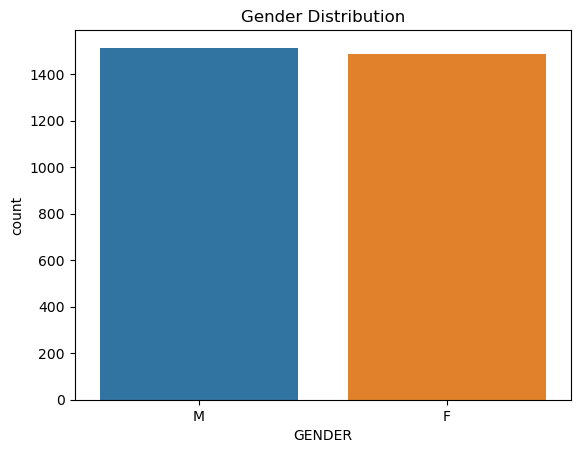

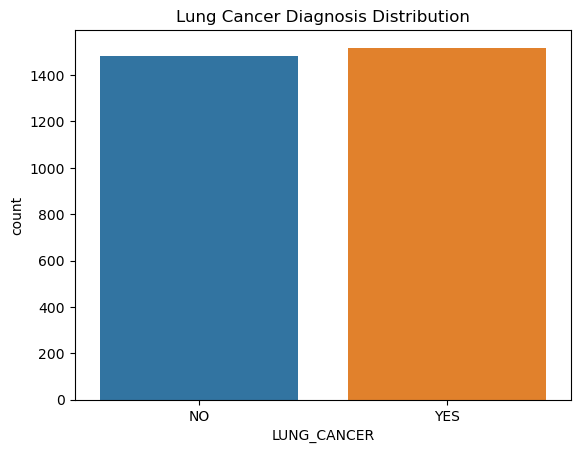

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plots for categorical features
sns.countplot(data=df, x='GENDER')
plt.title('Gender Distribution')
plt.show()

sns.countplot(data=df, x='LUNG_CANCER')
plt.title('Lung Cancer Diagnosis Distribution')
plt.show()


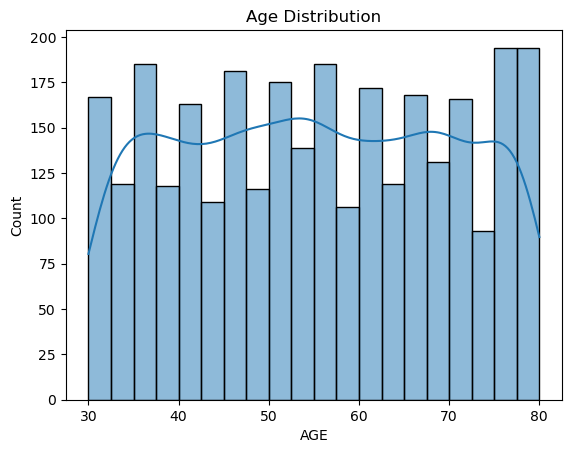

In [8]:
# Plot histogram for age
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()


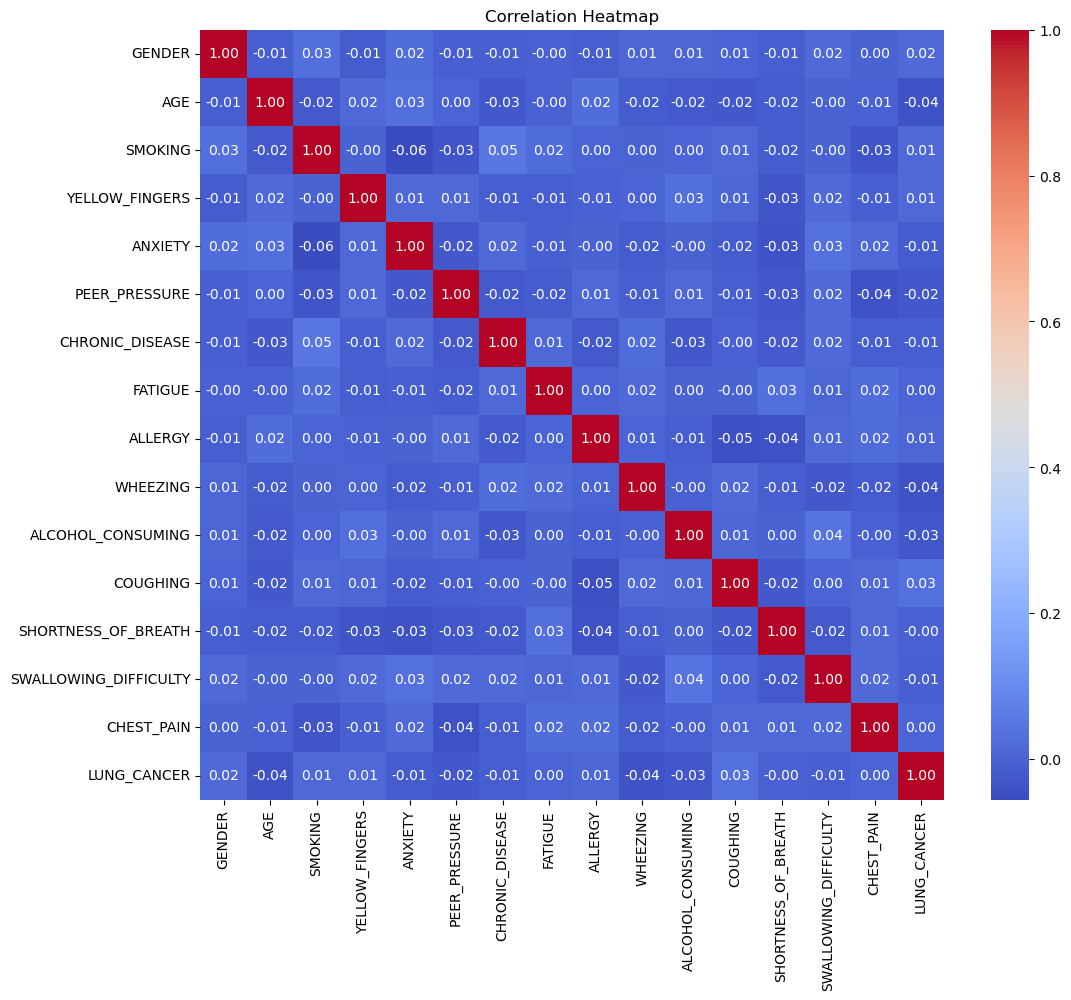

In [9]:
# Convert categorical features to numeric for correlation analysis
df_numeric = df.copy()
df_numeric['GENDER'] = df_numeric['GENDER'].map({'M': 0, 'F': 1})
df_numeric['LUNG_CANCER'] = df_numeric['LUNG_CANCER'].map({'NO': 0, 'YES': 1})

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Create pair plot
sns.pairplot(df_numeric, hue='LUNG_CANCER', palette='coolwarm')
plt.show()


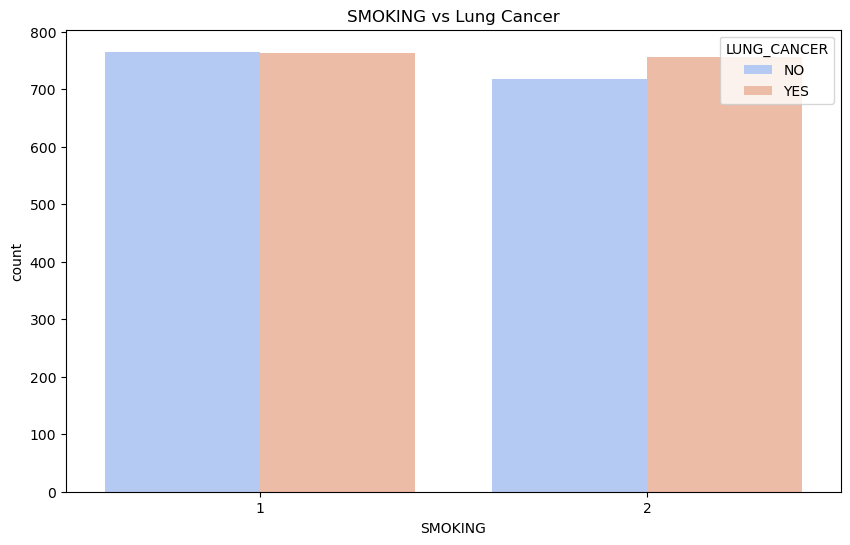

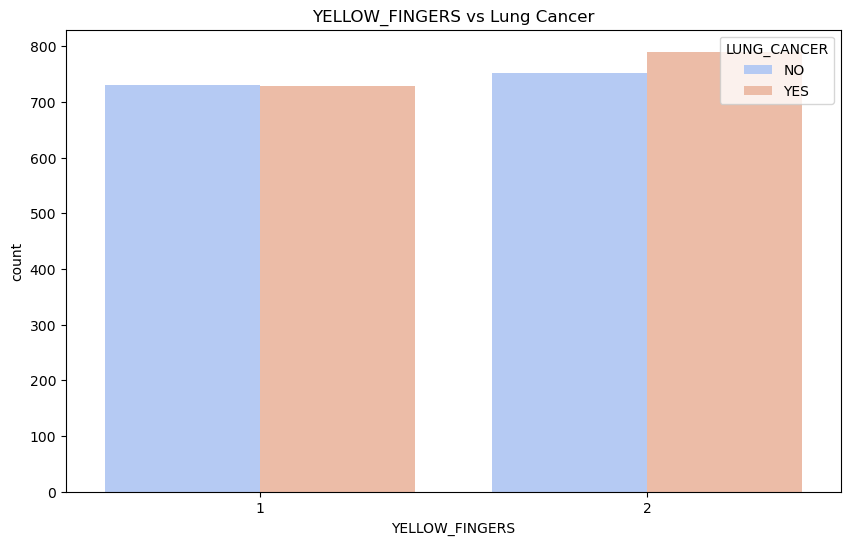

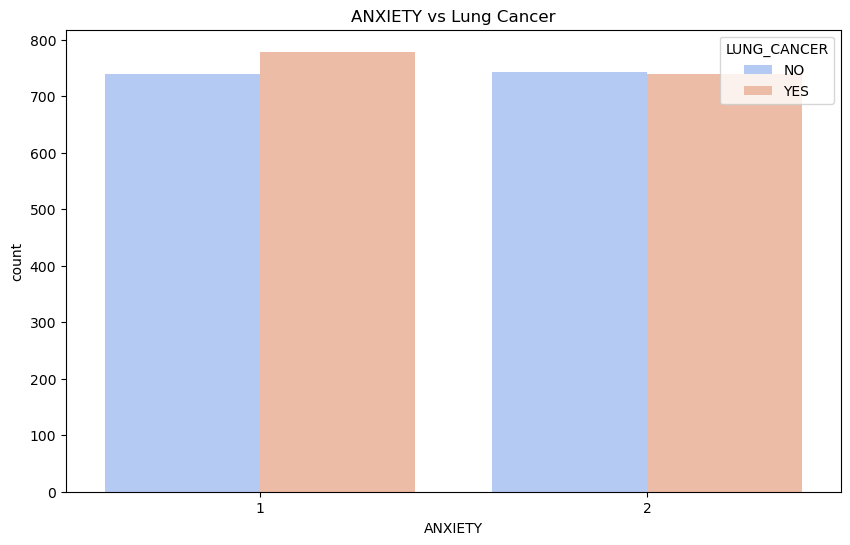

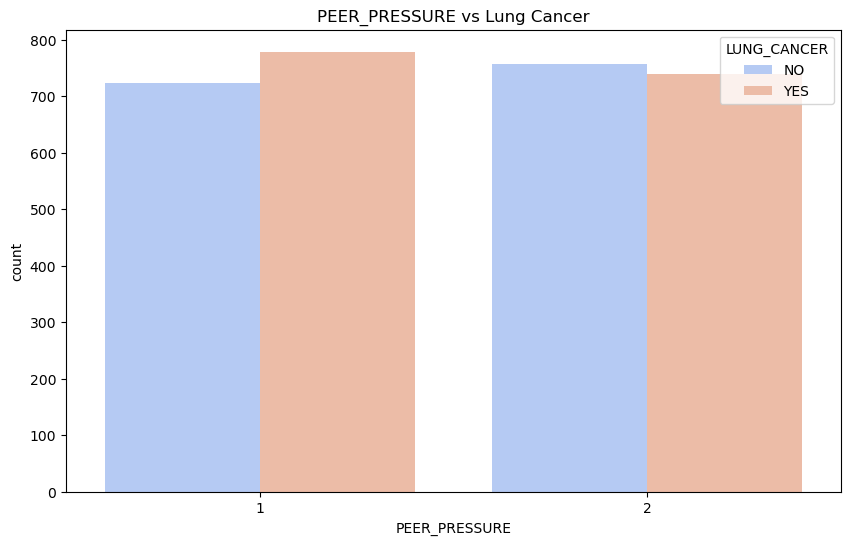

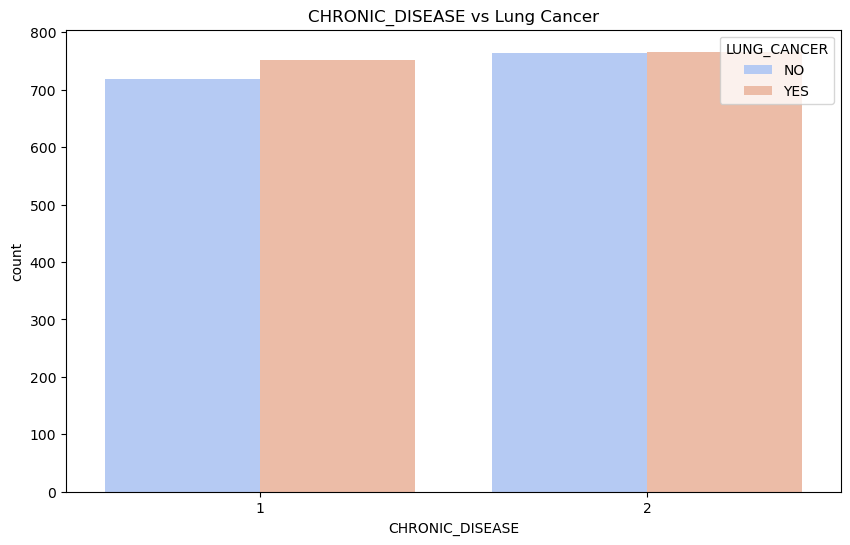

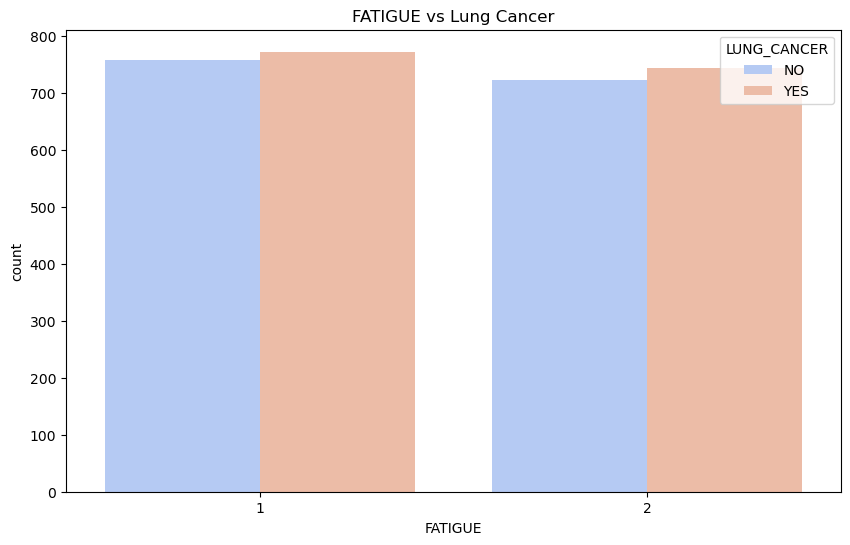

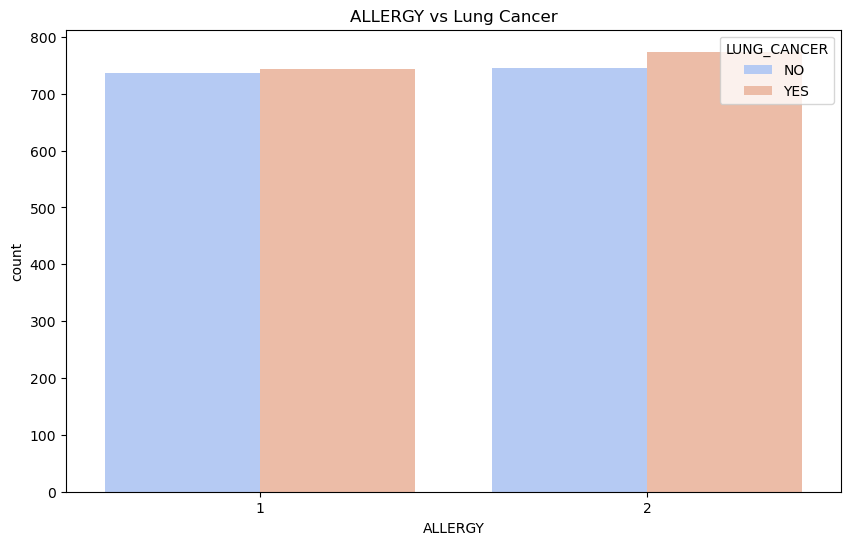

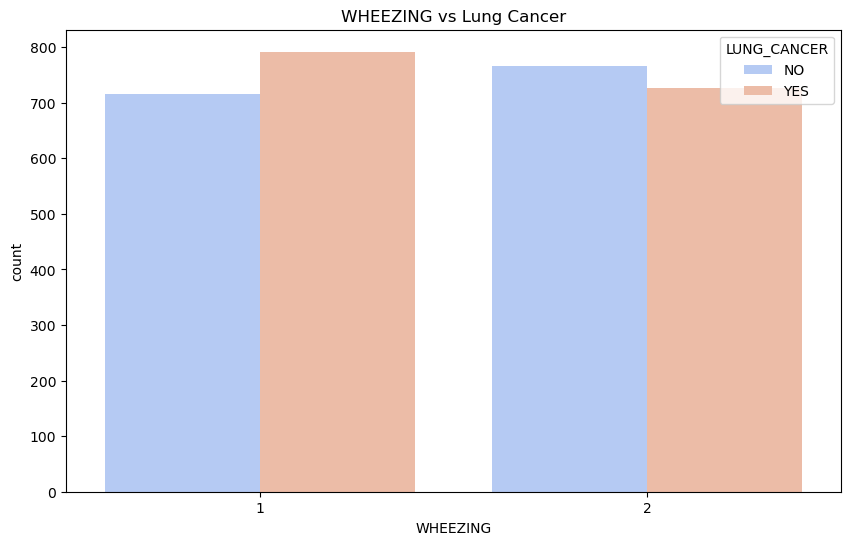

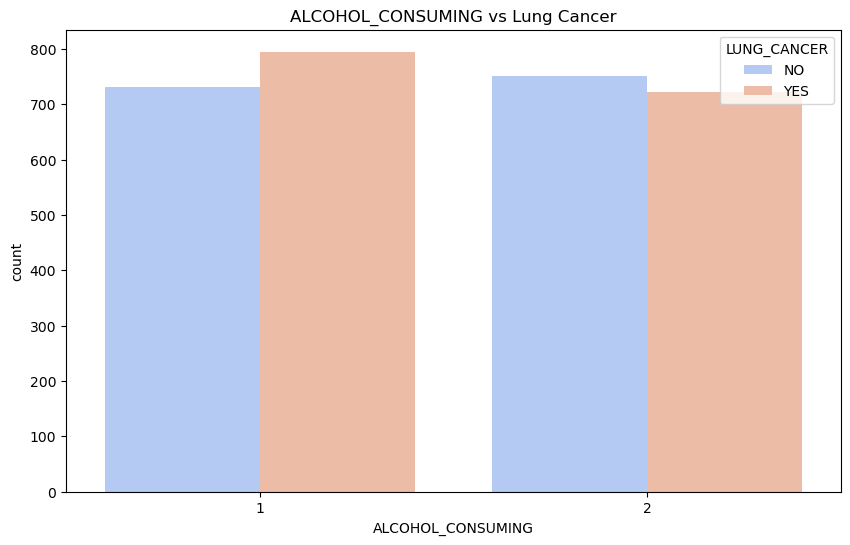

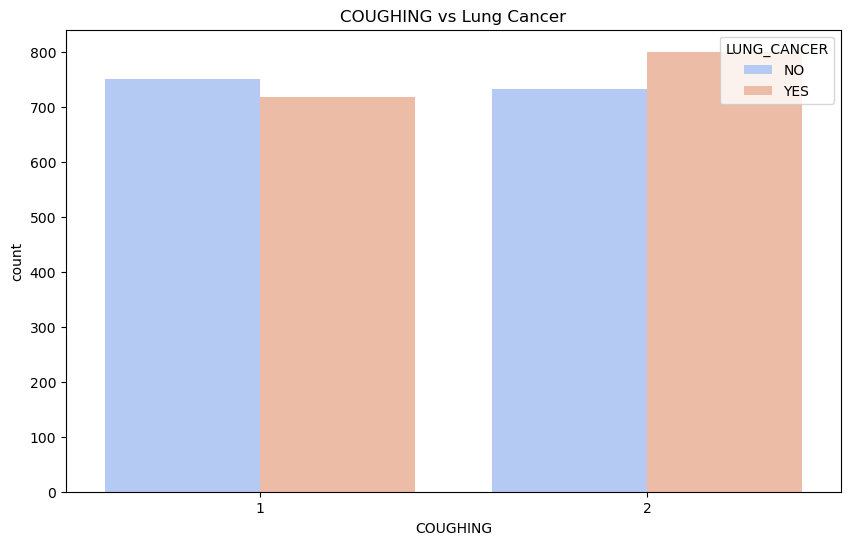

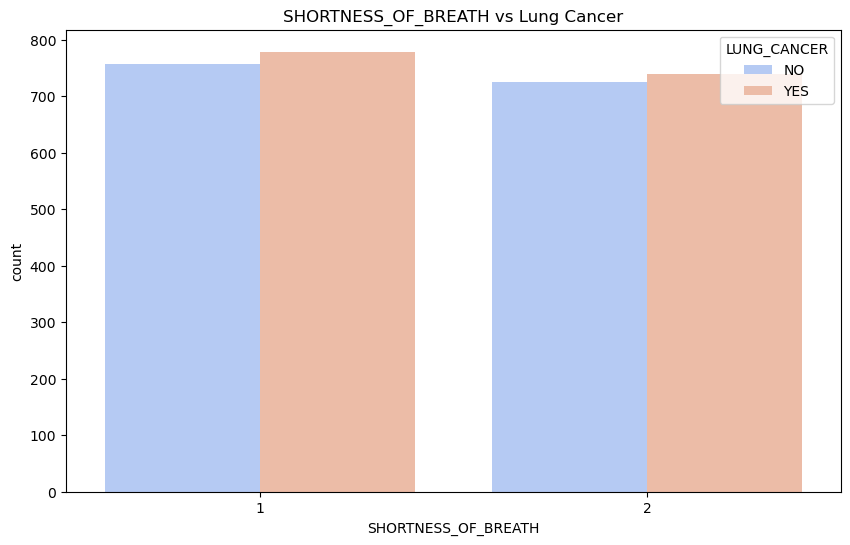

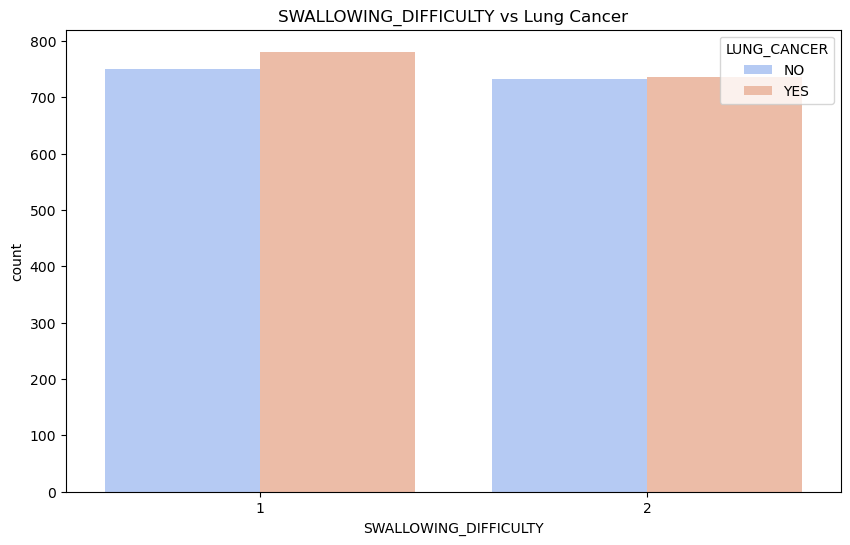

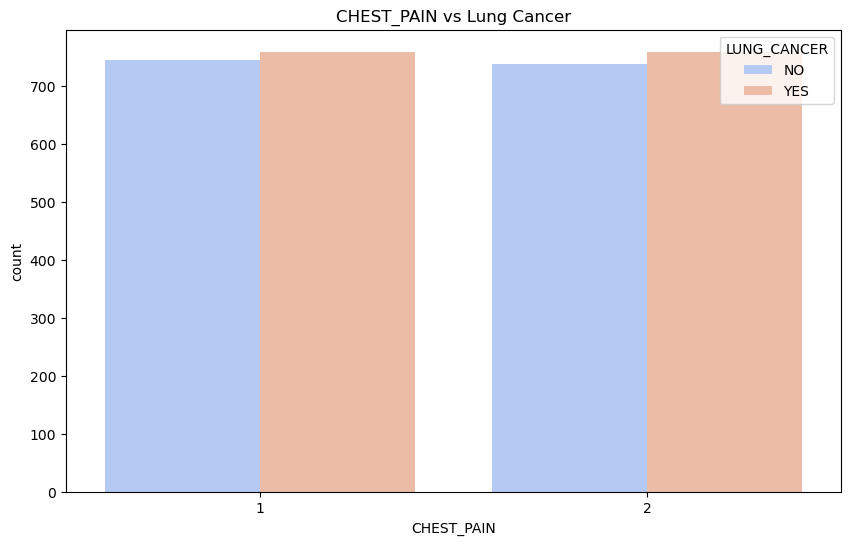

In [11]:
# Count plots for categorical features vs lung cancer
categorical_cols = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 
                     'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 
                     'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH', 
                     'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']

for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='LUNG_CANCER', palette='coolwarm')
    plt.title(f'{col} vs Lung Cancer')
    plt.show()
